# **Space X  Falcon 9 First Stage Landing Prediction**


In this notebook, we will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [44]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); 
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [45]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [46]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [47]:
# Extract the 'Class' column as a Pandas Series and assign it to Y
Y = data['Class']

Y = pd.Series(data['Class'].to_numpy())

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [48]:
# Create the StandardScaler object
transform = preprocessing.StandardScaler()

# Fit and transform the features, then reassign to X
X = transform.fit_transform(X)

X


array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [49]:

# Split the data: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [50]:
Y_test.shape

(18,)

In [51]:
# Convert X_train back to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Check for missing values
print(X_train_df.isna().sum())

# Convert Y_train to a Series
Y_train_series = pd.Series(Y_train)

# Check for missing values
print(Y_train_series.isna().sum())

0     0
1     0
2     0
3     0
4     0
     ..
78    0
79    0
80    0
81    0
82    0
Length: 83, dtype: int64
0


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [52]:
# Define the hyperparameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create the logistic regression model
lr = LogisticRegression()

# Set up GridSearchCV with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit to the training data
logreg_cv.fit(X_train, Y_train)

# Output best parameters and best cross-validation score
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Calculate the accuracy on the test data using the method <code>score</code>:


In [53]:
# Calculate accuracy on the test data using the best model from GridSearchCV
test_accuracy = logreg_cv.score(X_test, Y_test)

# Output the accuracy on the test data
print("Test accuracy: ", test_accuracy)


Test accuracy:  0.8333333333333334


Lets look at the confusion matrix:


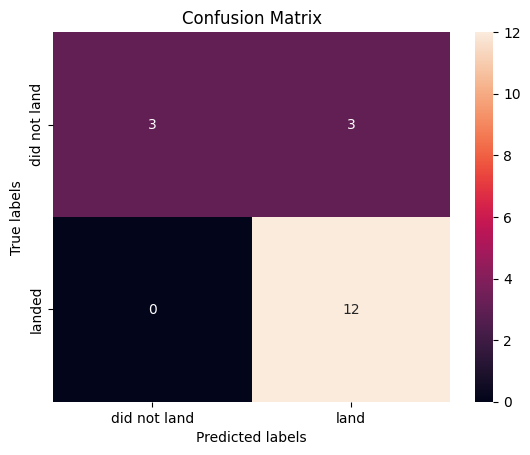

In [54]:
# Get predictions on the test data
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [55]:
# Define the hyperparameter grid for SVM
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': np.logspace(-3, 3, 5),  # Log-spaced values for C
              'gamma': np.logspace(-3, 3, 5)}  # Log-spaced values for gamma

# Create the SVM model
svm = SVC()

# Set up GridSearchCV with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model to the training data
svm_cv.fit(X_train, Y_train)

# Output best parameters and best cross-validation score
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calculate the accuracy on the test data using the method <code>score</code>:


In [56]:
# Calculate accuracy on the test data using the best model from GridSearchCV
svm_test_accuracy = svm_cv.score(X_test, Y_test)

# Output the accuracy on the test data
print("SVM Test accuracy: ", svm_test_accuracy)


SVM Test accuracy:  0.8333333333333334


We can plot the confusion matrix


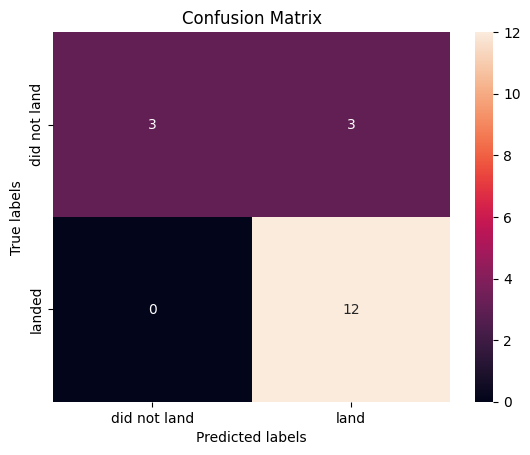

In [57]:
# Get predictions on the test data
yhat = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [58]:
# Correct the max_features parameter in the grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],  # Depth values from 2 to 18
    'max_features': ['sqrt', 'log2'],  # Changed 'auto' to 'sqrt' or 'log2'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree model
tree = DecisionTreeClassifier()

# Set up GridSearchCV with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model to the training data
tree_cv.fit(X_train, Y_train)

# Output best parameters and best cross-validation score
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)


tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8892857142857145


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [60]:
# Calculate the accuracy on the test data
accuracy_tree = tree_cv.score(X_test, Y_test)
print(f"Accuracy of Decision Tree on test data: {accuracy_tree}")


Accuracy of Decision Tree on test data: 0.7222222222222222


We can plot the confusion matrix


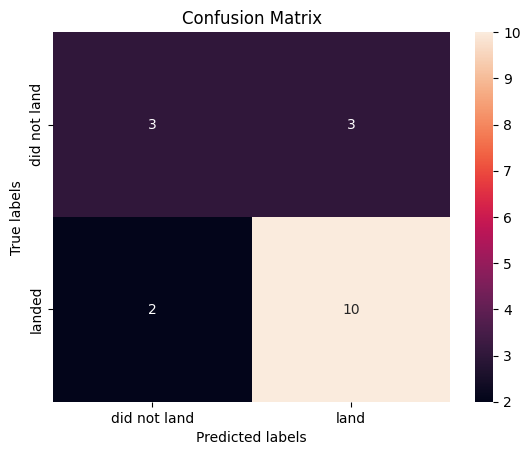

In [61]:
# Get predictions from the decision tree model
yhat_tree = tree_cv.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [62]:
# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=10)

# Fit the GridSearchCV object
knn_cv.fit(X_train, Y_train)

# Output the best hyperparameters and the best accuracy
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Accuracy on the test data: 0.8333333333333334


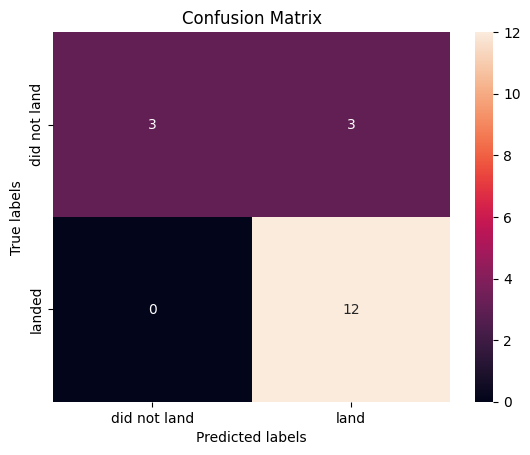

In [63]:
# Calculate the accuracy of knn_cv on the test data using the score method
accuracy = knn_cv.score(X_test, Y_test)
print("Accuracy on the test data:", accuracy)

# Predict the labels on the test data
yhat = knn_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)


Find the method performs best:


In [65]:
# Calculate the accuracy of each model on the test data using the score method
logreg_accuracy = logreg_cv.score(X_test, Y_test)
svm_accuracy = svm_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy of each model
print("Logistic Regression accuracy on test data:", logreg_accuracy)
print("SVM accuracy on test data:", svm_accuracy)
print("Decision Tree accuracy on test data:", tree_accuracy)
print("KNN accuracy on test data:", knn_accuracy)

# Find the best performing model
best_model = max([('Logistic Regression', logreg_accuracy),
                  ('SVM', svm_accuracy),
                  ('Decision Tree', tree_accuracy),
                  ('KNN', knn_accuracy)], key=lambda x: x[1])

print("\nBest performing model is:", best_model[0], "with accuracy:", best_model[1])


Logistic Regression accuracy on test data: 0.8333333333333334
SVM accuracy on test data: 0.8333333333333334
Decision Tree accuracy on test data: 0.7222222222222222
KNN accuracy on test data: 0.8333333333333334

Best performing model is: Logistic Regression with accuracy: 0.8333333333333334
